# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
df = pd.read_csv("data/temps.csv")
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [214]:
# Primeras filas
df.head()



,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [215]:
# Información del dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [216]:
# Estadísticas descriptivas
df.describe()



,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [217]:
# Verificar valores nulos
df.isnull().sum()

year              0
month             0
day               0
week              0
temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64

In [ ]:
# Eliminar columna year porque no es relevante para el análisis y no tiene sentido en el contexto de la predicción de temperaturas
df.drop("year", axis=1, inplace=True)
df

,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,1,1,Fri,45,45,45.6,45,43,50,44,29
1,1,2,Sat,44,45,45.7,44,41,50,44,61
2,1,3,Sun,45,44,45.8,41,43,46,47,56
3,1,4,Mon,44,41,45.9,40,44,48,46,53
4,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...
343,12,27,Tues,42,42,45.2,47,41,50,47,47
344,12,28,Wed,42,47,45.3,48,41,49,44,58
345,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,12,30,Fri,48,48,45.4,57,44,46,44,42


In [227]:
# Cambiamos la columna week que es un object, a un int. Uso metodo one-hot para convertir la columna week a variables dummy
df = pd.get_dummies(df, columns=['week'], prefix='week')

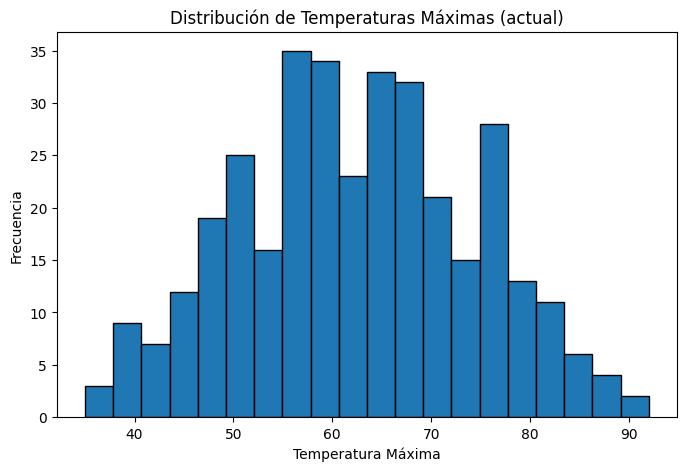

In [228]:
plt.figure(figsize=(8, 5))
plt.hist(df['actual'], bins=20, edgecolor='black')
plt.title('Distribución de Temperaturas Máximas (actual)')
plt.xlabel('Temperatura Máxima')
plt.ylabel('Frecuencia')
plt.show()

<Axes: >

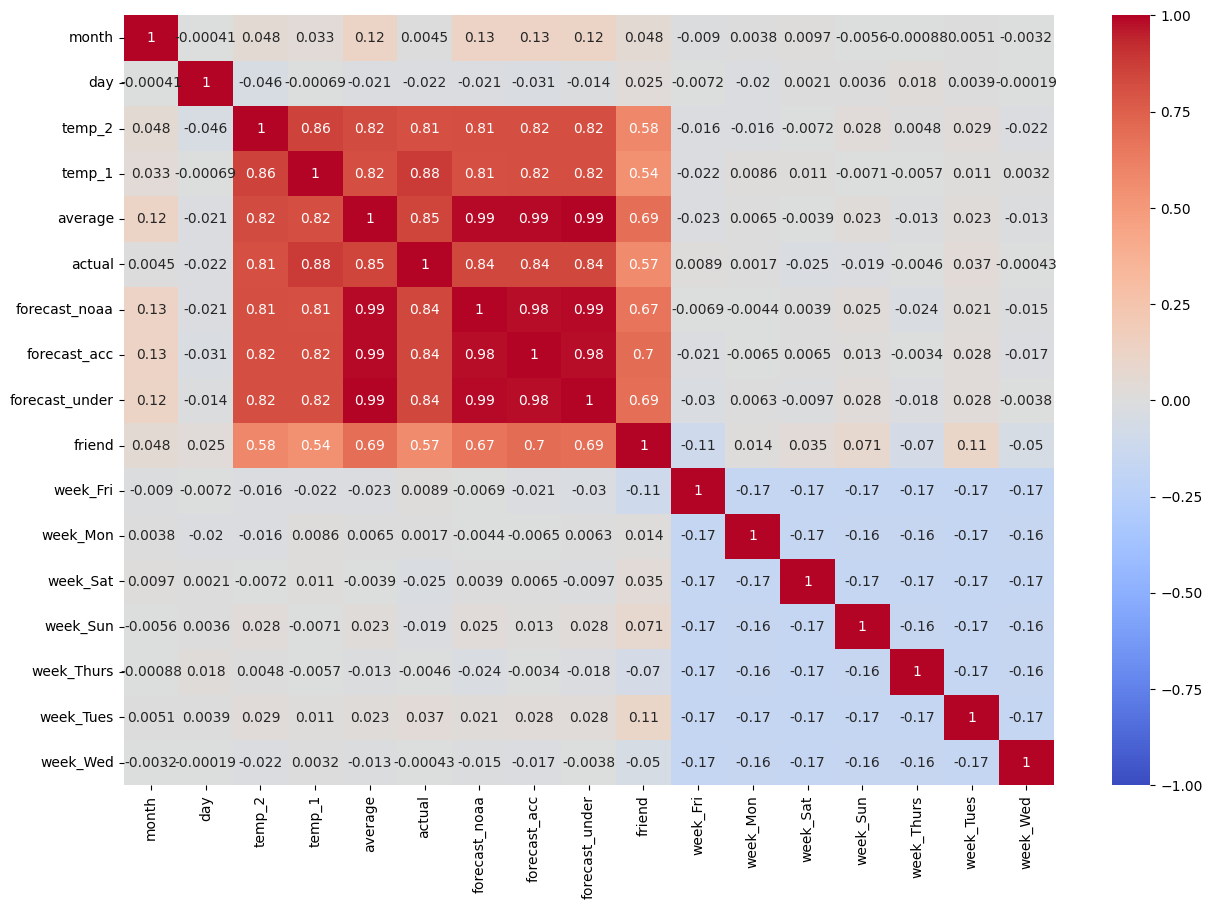

In [232]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-1)



#### Feature Engineering

In [233]:
# 1. Crear la característica: diferencia de temperatura (temp_change)
df['temp_change'] = df['temp_1'] - df['temp_2']

# 2. Crear la característica: diferencia entre la predicción del amigo y el promedio histórico (friend_diff)
df['friend_diff'] = df['friend'] - df['average']

# 3. Generar variables cíclicas para modelar la estacionalidad del mes
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Visualizar las primeras filas para confirmar que las nuevas features se han añadido
df.head()

,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,...,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed,temp_change,friend_diff,month_sin,month_cos
0,1,1,45,45,45.6,45,43,50,44,29,...,False,False,False,False,False,False,0,-16.6,0.5,0.866025
1,1,2,44,45,45.7,44,41,50,44,61,...,False,True,False,False,False,False,1,15.3,0.5,0.866025
2,1,3,45,44,45.8,41,43,46,47,56,...,False,False,True,False,False,False,-1,10.2,0.5,0.866025
3,1,4,44,41,45.9,40,44,48,46,53,...,True,False,False,False,False,False,-3,7.1,0.5,0.866025
4,1,5,41,40,46.0,44,46,46,46,41,...,False,False,False,False,True,False,-1,-5.0,0.5,0.866025


### 3. Selecciona variables y divide en train y test

In [ ]:
from sklearn.model_selection import train_test_split

# La columna 'actual' es la variable objetivo y queremos usar todas las demás columnas como features
X = df.drop("actual", axis=1)
y = df["actual"]

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [236]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 20)
(70, 20)
(278,)
(70,)


In [237]:
df["target"] = df["actual"]

### 4. Entrena el modelo


In [272]:
from sklearn.tree import DecisionTreeClassifier

# Suponiendo que ya tienes el DataFrame df con todas las features preprocesadas,
# creamos la variable categórica 'target' (1 si 'actual' > 'average', 0 en caso contrario)
df['target'] = (df['actual'] > df['average']).astype(int)

# Seleccionamos las features: usamos todas las columnas excepto 'actual' y 'target'
X = df.drop(['actual', 'target'], axis=1)
y = df['target']

# Inicializamos el DecisionTreeClassifier con una profundidad máxima de 2 niveles
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Entrenamos el modelo usando todo el dataset (similar al ejemplo de iris)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

### 5. Evaluación de tu modelo

Calcula el MAE, MAPE, MSE y RMSE.

In [271]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calcular MAE y MSE utilizando las funciones de sklearn
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# El RMSE es la raíz cuadrada del MSE
rmse = np.sqrt(mse)

# Para el MAPE hay que tener cuidado: en datos binarios (0,1) pueden producirse divisiones por 0.
# Se calculará el MAPE solo para aquellos valores en y_test que sean distintos de 0.
non_zero_indices = y_test != 0
if non_zero_indices.sum() > 0:
    mape = np.mean(np.abs((y_test[non_zero_indices] - y_pred[non_zero_indices]) / y_test[non_zero_indices])) * 100
else:
    mape = np.nan

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 0.32857142857142857
Mean Squared Error (MSE): 0.32857142857142857
Root Mean Squared Error (RMSE): 0.5732115042211109
Mean Absolute Percentage Error (MAPE): 21.27659574468085


### 6. Representa el árbol de decisión

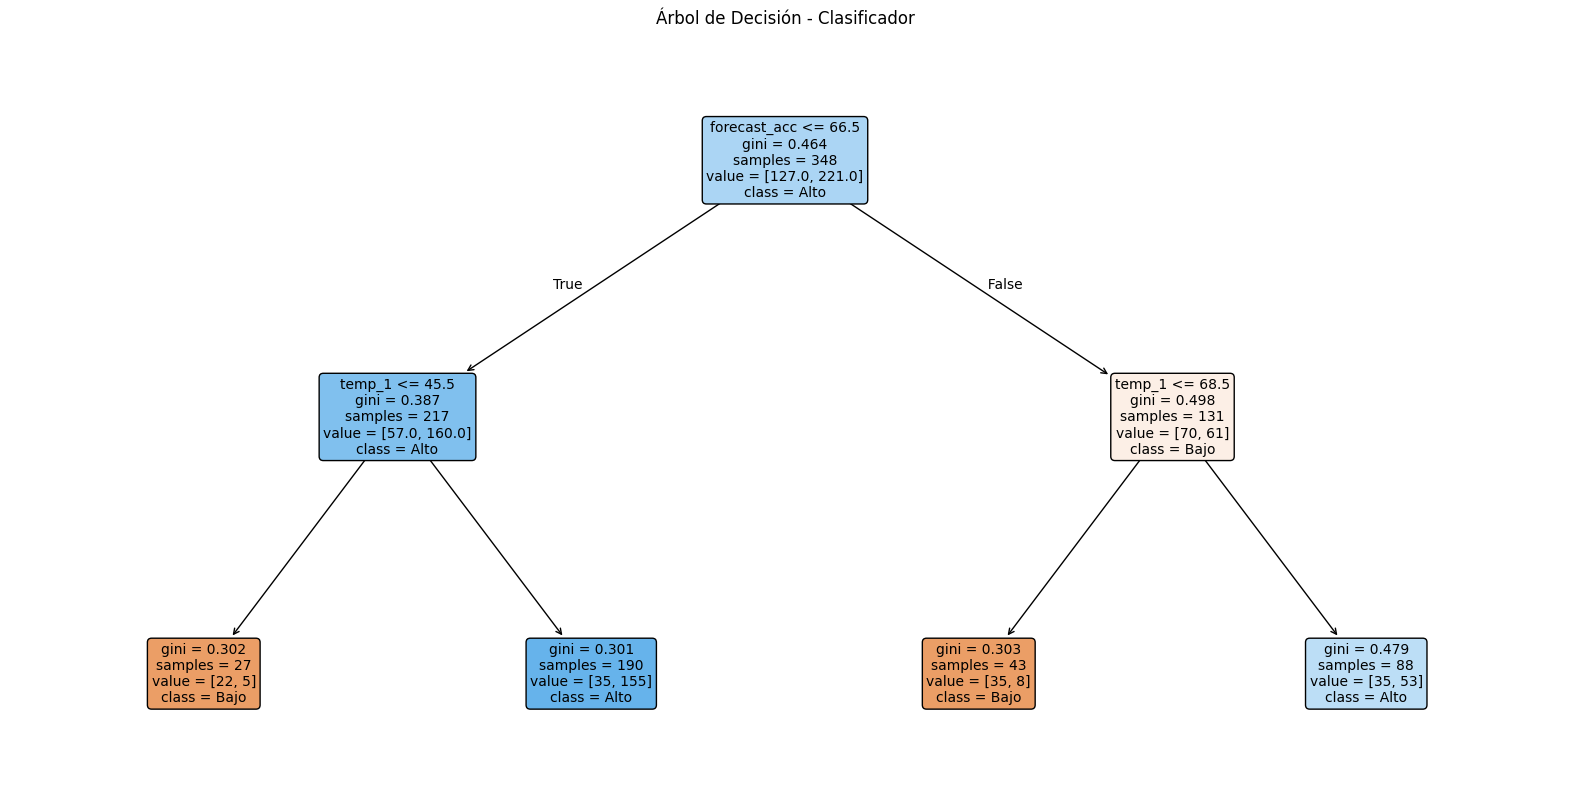

In [270]:

from sklearn import tree

# Configura el tamaño de la figura para una visualización cómoda
plt.figure(figsize=(20, 10))

# Visualiza el árbol de decisión usando tree.plot_tree con etiquetas de features y clases
tree.plot_tree(
    tree_clf, 
    feature_names=X.columns, 
    class_names=['Bajo', 'Alto'], 
    filled=True, 
    rounded=True, 
    fontsize=10,
    max_depth=2  # Esto se ajusta según la profundidad que hayas definido para el modelo
)

plt.title("Árbol de Decisión - Clasificador")
plt.show()

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

Exactitud (Accuracy): 0.6714285714285714
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.50      0.43      0.47        23
           1       0.74      0.79      0.76        47

    accuracy                           0.67        70
   macro avg       0.62      0.61      0.61        70
weighted avg       0.66      0.67      0.67        70

Matriz de Confusión:
[[10 13]
 [10 37]]


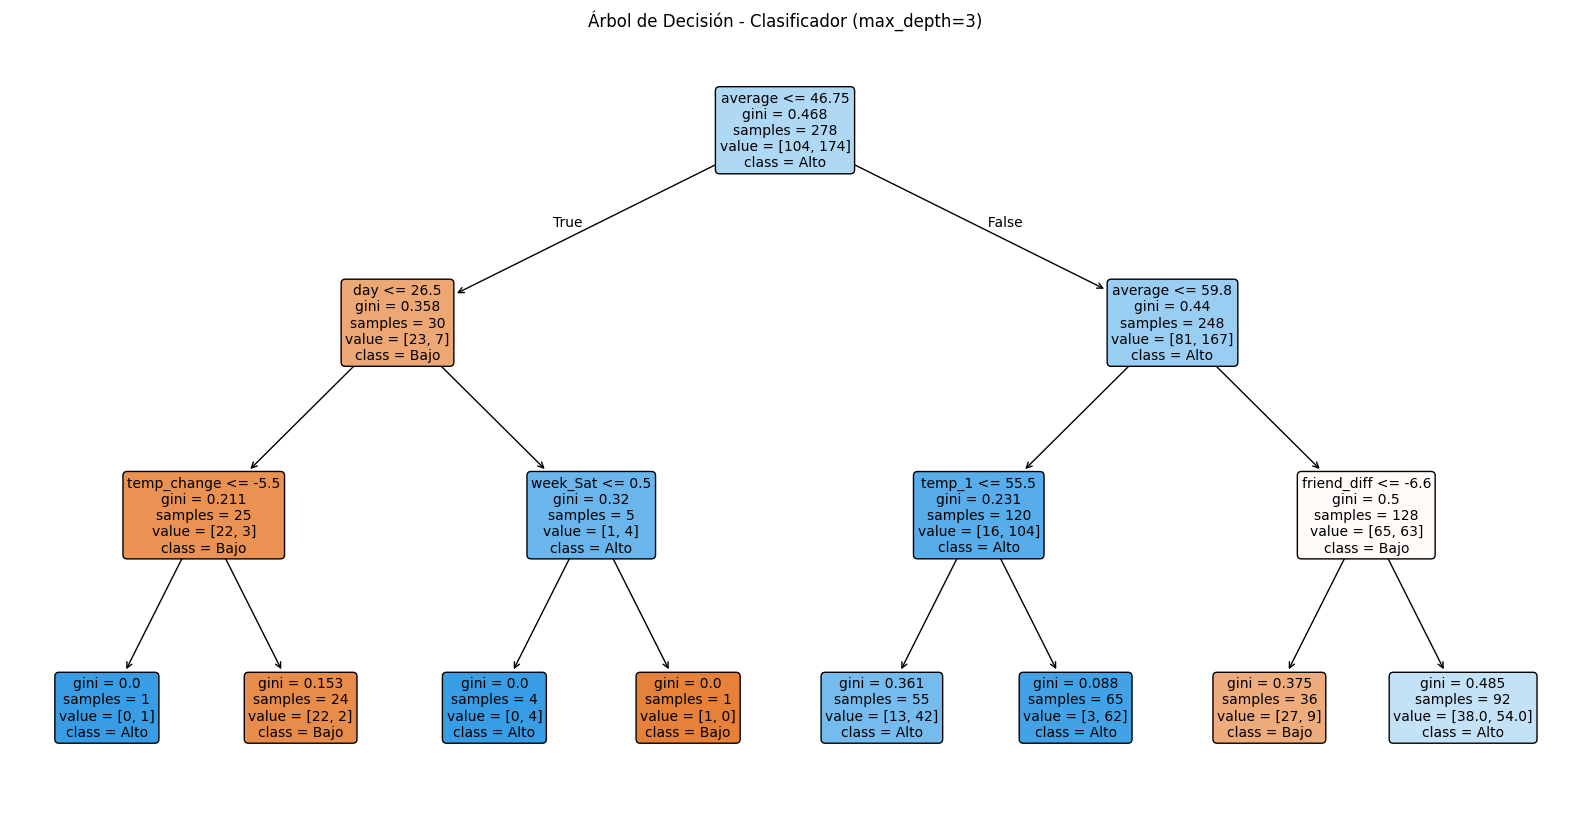

In [245]:


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



# Inicializar el clasificador con max_depth=3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud (Accuracy):", accuracy)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualizar el árbol de decisión con max_depth=3
plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf, 
    feature_names=X_train.columns, 
    class_names=['Bajo', 'Alto'], 
    filled=True, 
    rounded=True, 
    fontsize=10,
    max_depth=3  # Visualizamos hasta 3 niveles
)
plt.title("Árbol de Decisión - Clasificador (max_depth=3)")
plt.show()

### 8. Vuelve a evaluar tu modelo

In [259]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def evaluar_modelo(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred))
    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))

# Supongamos que ya reentrenaste el modelo con max_depth=3:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Ahora, "re-evaluamos" el nuevo modelo llamando a la función:
evaluar_modelo(clf, X_test, y_test)


Exactitud (Accuracy): 0.6714285714285714
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.50      0.43      0.47        23
           1       0.74      0.79      0.76        47

    accuracy                           0.67        70
   macro avg       0.62      0.61      0.61        70
weighted avg       0.66      0.67      0.67        70

Matriz de Confusión:
[[10 13]
 [10 37]]


### 9. Vuelve a representar su árbol

Exactitud (Accuracy): 0.6714285714285714
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.50      0.43      0.47        23
           1       0.74      0.79      0.76        47

    accuracy                           0.67        70
   macro avg       0.62      0.61      0.61        70
weighted avg       0.66      0.67      0.67        70

Matriz de Confusión:
[[10 13]
 [10 37]]


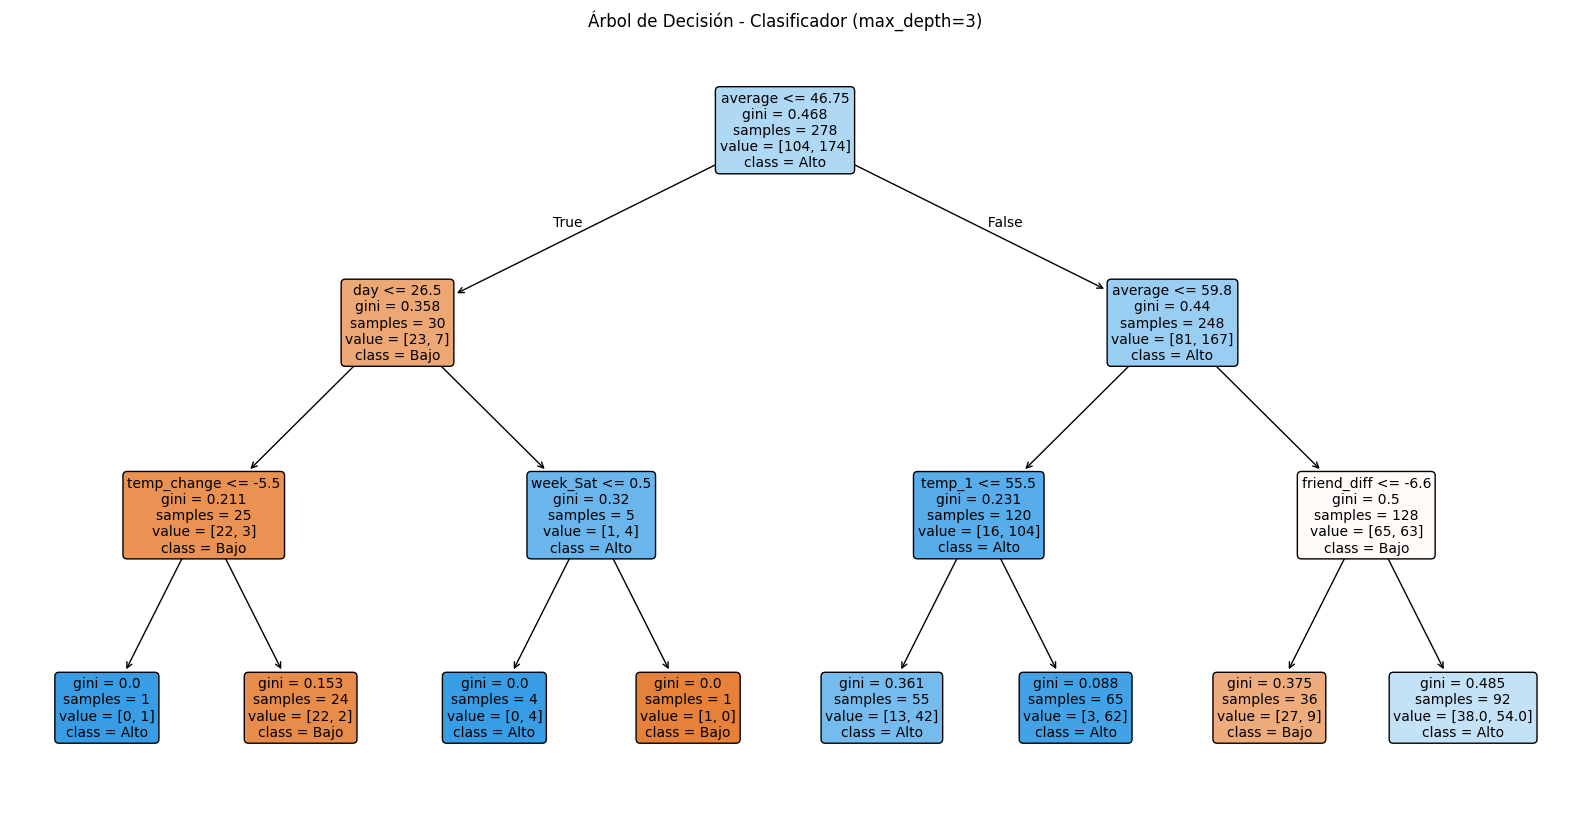

In [258]:


# Reentrenar el modelo con max_depth=3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Evaluar el nuevo modelo
evaluar_modelo(clf, X_test, y_test)

# Visualizar el árbol de decisión hasta 3 niveles
plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf, 
    feature_names=X_train.columns, 
    class_names=['Bajo', 'Alto'], 
    filled=True, 
    rounded=True, 
    fontsize=10,
    max_depth=3
)
plt.title("Árbol de Decisión - Clasificador (max_depth=3)")
plt.show()

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [263]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

parameters = {
    "max_depth" : [2,3,4,5]
}

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error")

In [268]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


y_pred = dtr_gs.best_estimator_.predict(X_test)

print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

### 11. Obten el `feature_importances` de cada variable en el último modelo

In [ ]:
# Extraer las importancias del mejor estimador
importances = dtr_gs.best_estimator_.feature_importances_

# Verificar que el número de importancias coincide con el número de features
if len(importances) != len(X_reg.columns):
    raise ValueError("El número de importancias no coincide con el número de columnas de X_reg. Verifica que X_reg es un DataFrame y no ha sido convertido a un array.")

# Crear un DataFrame para visualizar las importancias de forma ordenada
feature_importance_df = pd.DataFrame({
    'Feature': X_reg.columns,
    'Importance': importances
})

# Ordenar el DataFrame de mayor a menor importancia
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.